In [ ]:
#TASK2-1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Dataset .csv')

# Calculate the percentage of restaurants offering table booking
table_booking_counts = df['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Table Booking:")
print(table_booking_counts)

# Calculate the percentage of restaurants offering online delivery
online_delivery_counts = df['Has Online delivery'].value_counts(normalize=True) * 100
print("\nPercentage of Restaurants Offering Online Delivery:")
print(online_delivery_counts)


Percentage of Restaurants Offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of Restaurants Offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


In [ ]:
# Calculate average ratings for restaurants with and without table booking
average_rating_with_table_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_table_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("\nAverage Rating of Restaurants Offering Table Booking:", average_rating_with_table_booking)
print("Average Rating of Restaurants Not Offering Table Booking:", average_rating_without_table_booking)



Average Rating of Restaurants Offering Table Booking: 3.4419689119170984
Average Rating of Restaurants Not Offering Table Booking: 2.559358989634219


<Figure size 1000x600 with 0 Axes>

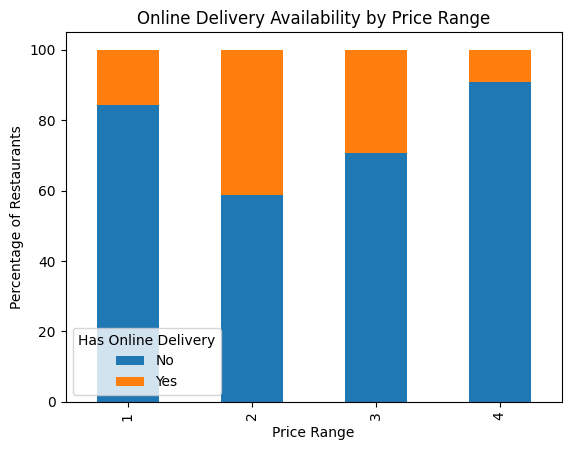

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for price range as a categorical variable if it is not already
if df['Price range'].dtype != 'category':
    df['Price range'] = df['Price range'].astype('category')

# Analyze the availability of online delivery across different price ranges
online_delivery_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100

# Plot the availability of online delivery by price range
plt.figure(figsize=(10, 6))
online_delivery_by_price_range.plot(kind='bar', stacked=True)
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Percentage of Restaurants')
plt.legend(title='Has Online Delivery')
plt.show()


In [ ]:
#TASK2-2


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Dataset .csv')

# Determine the most common price range
most_common_price_range = df['Price range'].mode()[0]
print("Most Common Price Range:", most_common_price_range)


Most Common Price Range: 1


In [ ]:
# Calculate the average rating for each price range
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating for Each Price Range:")
print(average_rating_by_price_range)



Average Rating for Each Price Range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


In [ ]:
# Identify the color that represents the highest average rating among different price ranges
# Assuming 'Rating color' is the color associated with the average rating
average_rating_by_price_range_with_color = df.groupby('Price range').agg({
    'Aggregate rating': 'mean',
    'Rating color': lambda x: x.mode()[0]  # Assuming the most common color is chosen if multiple
}).reset_index()

# Find the price range with the highest average rating
highest_avg_rating = average_rating_by_price_range_with_color['Aggregate rating'].max()
color_with_highest_avg_rating = average_rating_by_price_range_with_color[
    average_rating_by_price_range_with_color['Aggregate rating'] == highest_avg_rating
]['Rating color'].values[0]

print("\nColor Representing the Highest Average Rating Among Different Price Ranges:")
print(color_with_highest_avg_rating)



Color Representing the Highest Average Rating Among Different Price Ranges:
Yellow


In [ ]:
#TASK2-3

In [ ]:


# Extract the length of the restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)

# Extract the length of the address
df['Address Length'] = df['Address'].apply(len)

# Display the first few rows to verify the new features
print(df[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length']].head())


          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  
0  Third Floor, Century City Mall, Kalayaan Avenu...              71  
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67  
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56  
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70  
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64  


In [ ]:
# Encode "Has Table booking" (Yes/No) to binary (1/0)
df['Has Table Booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Encode "Has Online delivery" (Yes/No) to binary (1/0)
df['Has Online Delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Display the first few rows to verify the new features
print(df[['Has Table booking', 'Has Table Booking', 'Has Online delivery', 'Has Online Delivery']].head())


  Has Table booking  Has Table Booking Has Online delivery  \
0               Yes                  1                  No   
1               Yes                  1                  No   
2               Yes                  1                  No   
3                No                  0                  No   
4               Yes                  1                  No   

   Has Online Delivery  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
